## Visualising wallet data
Here we visualise and study the number of wallets to maybe get a better understanding at Bitcoin's value and number of wallets.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Load data from csv downloaded from blockchain.info
df = pd.read_csv('data/wallet_users.csv', names=['Date', 'Wallets'], index_col='Date', parse_dates=True)

# Resample data into daily wallets, 
group_period = 'D'
resampled_df = df.resample(group_period).mean()

# Missing values between 2017 July 13 to August 01 and 2017 September 15 to 20th. 
resampled_df[pd.isnull(resampled_df).any(axis=1)]

,Wallets
Date,
2017-07-14,NaN
2017-07-15,NaN
2017-07-16,NaN
2017-07-17,NaN
2017-07-18,NaN
2017-07-19,NaN
2017-07-20,NaN
2017-07-21,NaN
2017-07-22,NaN


## Find and replace missing data

In [3]:
# Linear interpolate for the missing data
resampled_df['20170710':] = resampled_df['20170710':].interpolate(method='time', axis=0)

# Check for null data in 2017
resampled_df['2017-01-01':].isnull().any()

Wallets    False
dtype: bool

In [4]:
# Get gradient of data
resampled_df['Gradient'] = np.gradient(resampled_df['Wallets'])
resampled_df.tail()

,Wallets,Gradient
Date,,
2017-12-15,2.057466e+07,72397.125000
2017-12-16,2.064303e+07,68064.833333
2017-12-17,2.071079e+07,74480.500000
2017-12-18,2.079199e+07,77126.000000
2017-12-19,2.086504e+07,73053.083333


## Plotting the data

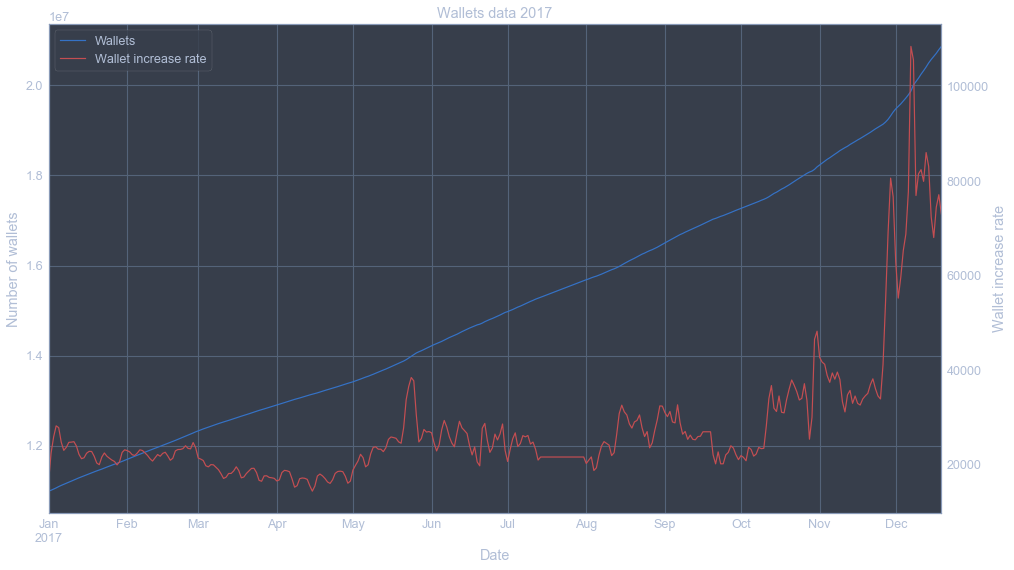

In [5]:
# Set data to plot
data = resampled_df['2017':]

# Plot
fig, ax = plt.subplots(figsize=(16,9))

ax2 = ax.twinx()
data.Wallets.plot(ax=ax, style='b')
data.Gradient.plot(ax=ax2, style='r')

# Left axis
ax.set_ylabel('Number of wallets')


# Right axis
ax2.set_ylabel('Wallet increase rate')
ax2.grid(False)

plt.title('Wallets data 2017')
ax.set_xlabel('Date')
ax.legend([ax.get_lines()[0], ax2.get_lines()[0]],
           ['Wallets','Wallet increase rate'], loc=2)

plt.show()

In [6]:
resampled_df['Laplacian'] = np.gradient(resampled_df['Gradient'])

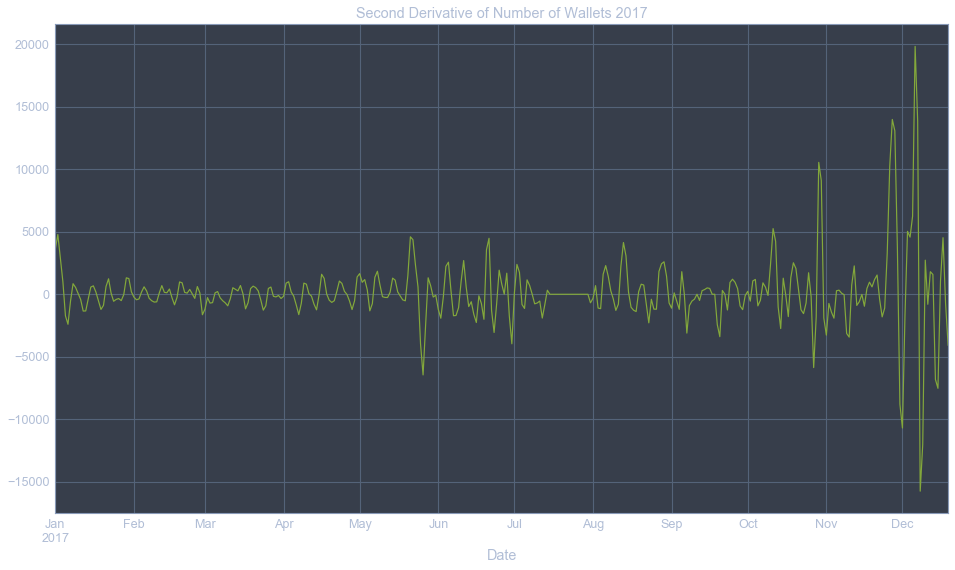

In [7]:
# Set data to plot
data = resampled_df['2017':]

# Plot
fig, ax = plt.subplots(figsize=(16,9))

data.Laplacian.plot(ax=ax, style='g')


plt.title('Second Derivative of Number of Wallets 2017')
ax.set_xlabel('Date')
ax.xaxis_date()

plt.show()